<a href="https://colab.research.google.com/github/sairagillani18k/CRNN_scene_text/blob/main/CRNN_Ultrahack_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Make sure you have GPU hardware accelerator
# Goto Runtime > Change runtime type, select GPU as Hardware accelerator and click Save

# Downloading Dataset

In [ ]:
# !wget https://tukl.seecs.nust.edu.pk/datasets/upti/upti-1.zip
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=14Lxblli_ud0-6VBY1XcTlZInoeudknfv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=14Lxblli_ud0-6VBY1XcTlZInoeudknfv" -O upti-1.zip && rm -rf /tmp/cookies.txt
# !wget https://tukl.seecs.nust.edu.pk/datasets/upti/upti-1.zip
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=14Lxblli_ud0-6VBY1XcTlZInoeudknfv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=14Lxblli_ud0-6VBY1XcTlZInoeudknfv" -O images.part01.rar&& rm -rf /tmp/cookies.txt

--2021-12-07 20:12:37--  https://docs.google.com/uc?export=download&confirm=46Yn&id=14Lxblli_ud0-6VBY1XcTlZInoeudknfv
Resolving docs.google.com (docs.google.com)... 172.217.212.102, 172.217.212.138, 172.217.212.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-08-docs.googleusercontent.com/docs/securesc/9ja7ocdk6ugc0dpf1jn6emm8iqlvnm13/9dteefb9o75p4b6mh9j3u8hp468h8o1e/1638907950000/09088518875595403463/02579735706252647519Z/14Lxblli_ud0-6VBY1XcTlZInoeudknfv?e=download [following]
--2021-12-07 20:12:38--  https://doc-0k-08-docs.googleusercontent.com/docs/securesc/9ja7ocdk6ugc0dpf1jn6emm8iqlvnm13/9dteefb9o75p4b6mh9j3u8hp468h8o1e/1638907950000/09088518875595403463/02579735706252647519Z/14Lxblli_ud0-6VBY1XcTlZInoeudknfv?e=download
Resolving doc-0k-08-docs.googleusercontent.com (doc-0k-08-docs.googleusercontent.com)... 142.250.136.132, 2607:f8b0:4001:c34::84
Conne

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored

In [ ]:
#!unzip upti-1.zip
!unzip images.part01.rar

Archive:  images.part01.rar
  inflating: UPTI/Sabbour-Arabic-OCR-DRR2013.pdf  
  inflating: UPTI/ligature_undegraded.zip  
  inflating: UPTI/line_undegraded.zip  
  inflating: UPTI/groundtruth.zip    
  inflating: UPTI/line_degraded.zip   bad CRC 993fa826  (should be a7bf3afb)
  inflating: UPTI/ligature_degraded.zip  


In [ ]:
%cp images.part01.rar ./
#%cp UP/groundtruth.zip ./

cp: 'images.part01.rar' and './images.part01.rar' are the same file


In [ ]:
#!unzip line_undegraded.zip
#!unzip groundtruth.zip
!unzip images.part01.rar

Archive:  images.part01.rar
replace UPTI/Sabbour-Arabic-OCR-DRR2013.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Loading and Splitting Dataset

In [ ]:
# Importing libraries
import os
import glob
import random
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

In [ ]:
# Getting list of images and labels
images_list = sorted(glob.glob("line_undegraded/*.png"))
labels_list = sorted(glob.glob("groundtruth/*.txt"))

روکنے اور نقص امن کا بھی مورد الزام ٹھہرایا گیا۔ 



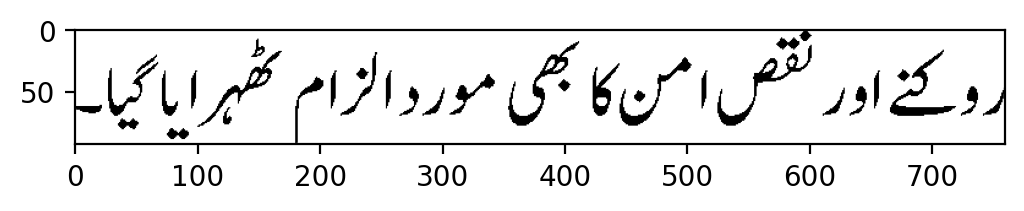

In [ ]:
# Testiing if labels match with images
plt.imshow(cv.imread(images_list[1000]))
stream = open(labels_list[1000])
text = stream.read()
stream.close()
print(text)

In [ ]:
# Load all labels
# Compute all possible characters
# Compute maximum length of a label
max_length = 0
characters = []
labels = []
for i, label in enumerate(labels_list):
  stream = open(label, "r", encoding="utf-8")
  text = stream.read().strip()
  stream.close()
  labels.append(text)
  max_length = max(len(text), max_length)
  for c in text:
    if c not in characters:
      characters.append(c)
characters = sorted(characters)
print("Maximum length = " + str(max_length))

Maximum length = 94


In [ ]:
print(",".join(characters))
print("Total classes = " + str(len(characters) + 1))

 ,!,",#,%,',(,),+,,,-,.,/,0,1,2,3,4,5,6,7,8,9,:,A,B,C,D,E,F,G,I,J,K,L,M,N,O,P,R,S,T,U,V,W,Y,a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,r,s,t,u,v,w,x,z,،,؛,؟,ء,آ,أ,ؤ,ئ,ا,ب,ة,ت,ث,ج,ح,خ,د,ذ,ر,ز,س,ش,ص,ض,ط,ظ,ع,غ,ف,ق,ل,م,ن,ه,و,ً,َ,ُ,ِ,ّ,ْ,ٓ,ٰ,ٴ,ٹ,پ,چ,ڈ,ڑ,ژ,ک,گ,ں,ھ,ہ,ی,ے,۔,‘,’,“,”,…,,,ﷺ
Total classes = 136


In [ ]:
print(labels[1000])

روکنے اور نقص امن کا بھی مورد الزام ٹھہرایا گیا۔


In [ ]:
# Max image width
fixed_height = 32
max_width = 0
for image in images_list:
  image = cv.imread(image, 0)
  h, w = image.shape
  width = int(fixed_height / h * w)
  max_width = max(max_width, width)
print("Maximum width = " + str(max_width))

Maximum width = 1362


In [ ]:
# Manually adjust hyper-paramters
max_length = 100
max_width = 1400

In [ ]:
# Splitting dataset into 90% train set and 10% test set
ratio = 0.9
assert len(images_list) == len(labels)
images_list = np.array(images_list)
labels = np.array(labels)
random.seed(0)
indices = list(range(len(images_list)))
random.shuffle(indices)
train_images = images_list[indices[:int(len(images_list) * ratio)]]
train_labels = labels[indices[:int(len(labels) * ratio)]]
test_images = images_list[indices[int(len(images_list) * ratio):]]
test_labels = labels[indices[int(len(labels) * ratio):]]

اصغر گھرکی‘ خالد محمود سرگانہ‘ خرم نواب‘ محمد عامر غنی‘


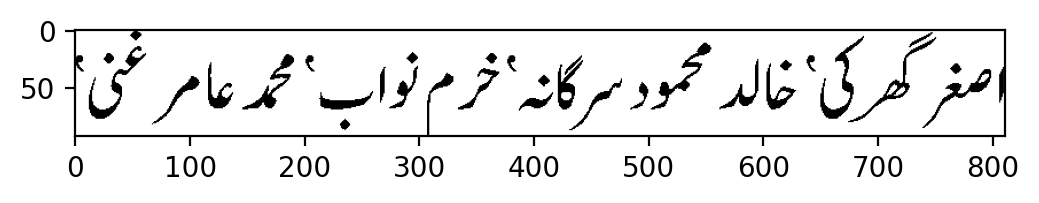

In [ ]:
plt.imshow(cv.imread(train_images[1000]))
print(train_labels[1000])

# Data Preprocessing

In [ ]:
def text_to_indices(text):
  indices = []
  for c in text:
    indices.append(characters.index(c) + 1)
  return indices

def indices_to_text(indices):
  text = ""
  last_x = None
  for x in indices:
    if x == last_x:
      continue
    last_x = x
    if x >= 1 and x <= len(characters):
      text += characters[x - 1]
  return text

In [ ]:
indices = text_to_indices(labels[1000])
print(indices)
print(indices_to_text(indices))

[88, 104, 120, 102, 126, 1, 78, 104, 88, 1, 102, 99, 92, 1, 78, 101, 102, 1, 120, 78, 1, 79, 123, 125, 1, 101, 104, 88, 86, 1, 78, 100, 89, 78, 101, 1, 114, 123, 124, 88, 78, 125, 78, 1, 121, 125, 78, 127]
روکنے اور نقص امن کا بھی مورد الزام ٹھہرایا گیا۔


In [ ]:
def resize_and_pad(image):
  image = image[:, ::-1]
  image = cv.resize(image, (int(fixed_height / h * w), fixed_height), interpolation=cv.INTER_CUBIC )
  padded_image = np.zeros((fixed_height, max_width))
  padded_image[:, :image.shape[1]] = image[:, :max_width]
  return padded_image / 255.0

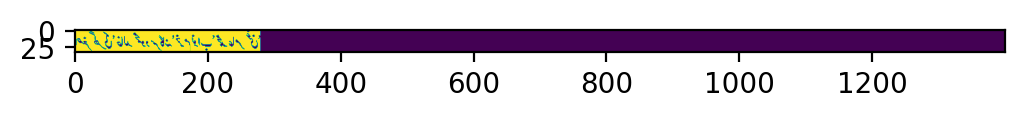

In [ ]:
image = cv.imread(train_images[1000], 0)
image = resize_and_pad(image)
plt.imshow(image)

# Creating Data Loader

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [ ]:
class UrduDataset(Dataset):
  def __init__(self, images, labels):
    super(Dataset, self).__init__()
    self.images = images
    self.labels = labels

  def __len__(self):
    return len(self.images)
    
  def __getitem__(self, index):
    image = self.images[index]
    label = self.labels[index]
    image = cv.imread(image, 0)
    h, w = image.shape
    seq_len = min(int(fixed_height / h * w), max_width)
    tgr_len = len(label)
    image = resize_and_pad(image)
    image = torch.FloatTensor(image).unsqueeze(0)
    label = text_to_indices(label)
    label = label + [0] * (max_length - len(label))
    label = torch.LongTensor(label)
    seq_len = torch.LongTensor([seq_len])
    tgr_len = torch.LongTensor([tgr_len])
    return image, label, seq_len, tgr_len

In [ ]:
train_data = UrduDataset(train_images, train_labels)
test_data = UrduDataset(test_images, test_labels)

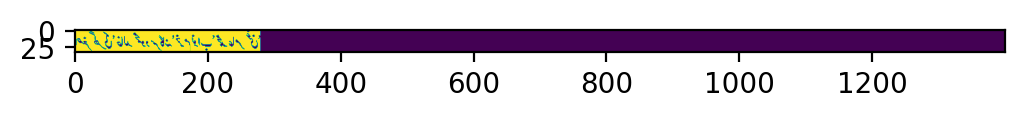

tensor([ 78,  92,  97,  88,   1, 121, 123,  88, 120, 125, 128,   1,  85,  78,
        100,  86,   1, 101,  84, 101, 104,  86,   1,  90,  88, 121,  78, 102,
        124, 128,   1,  85,  88, 101,   1, 102, 104,  78,  79, 128,   1, 101,
         84, 101,  86,   1,  96,  78, 101,  88,   1,  97, 102, 125, 128,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0])
اصغر گھرکی‘ خالد محمود سرگانہ‘ خرم نواب‘ محمد عامر غنی‘
tensor([282])
tensor([55])


In [ ]:
image, label, seq_len, tgr_len = train_data[1000]
plt.imshow(image.squeeze())
plt.show()
print(label)
print(indices_to_text(label))
print(seq_len)
print(tgr_len)

# Creating Model

In [ ]:
class CRNN(nn.Module):
  def __init__(self):
    super(CRNN, self).__init__()
    # (*, 1, 32, 1400)
    self.cnn1 = nn.Sequential(
        nn.Conv2d(1, 16, 3, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
    )
    # (*, 16, 16, 700)
    self.cnn2 = nn.Sequential(
        nn.Conv2d(16, 32, 3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
    )
    # (*, 32, 8, 350)
    self.cnn3 = nn.Sequential(
        nn.Conv2d(32, 64, 3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d((2, 1), (2, 1)),
    )
    # (*, 64, 4, 350)
    self.cnn4 = nn.Sequential(
        nn.Conv2d(64, 128, (4, 1)),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    )
    # (*, 128, 1, 350)
    # (*, 128, 350)
    # (*, 350, 128)
    self.gru = nn.GRU(128, 128, num_layers=2, batch_first=True, bidirectional=True)
    # (*, 350, 256)
    self.classifier = nn.Sequential(
        nn.Linear(256, len(characters) + 1),
        nn.LogSoftmax(dim=2)
    )
  
  def forward(self, x):
    x = self.cnn1(x)
    x = self.cnn2(x)
    x = self.cnn3(x)
    x = self.cnn4(x)
    x = x.squeeze(2).permute(0, 2, 1)
    x, _ = self.gru(x)
    x = self.classifier(x)
    return x

In [ ]:
# Initializing Model
device = "cuda:0"
model = CRNN().to(device)

In [ ]:
# Testing ins and outs
with torch.no_grad():
  output = model(image.unsqueeze(0).to(device))
  print(output)
  print(output.shape)

tensor([[[-5.1816, -4.9846, -4.8662,  ..., -4.9696, -4.6651, -5.2881],
         [-5.2442, -5.0963, -4.8069,  ..., -5.0609, -4.7291, -5.2728],
         [-5.3435, -5.1741, -4.8184,  ..., -5.1524, -4.5655, -5.2358],
         ...,
         [-5.0309, -4.9534, -5.0465,  ..., -4.9174, -4.9402, -5.0820],
         [-5.0217, -4.9605, -5.0340,  ..., -4.9109, -4.9397, -5.0671],
         [-5.0042, -4.9533, -5.0136,  ..., -4.9005, -4.9262, -5.0447]]],
       device='cuda:0')
torch.Size([1, 350, 136])


# Model Training

In [ ]:
import tqdm

In [ ]:
# Creating data loader
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [ ]:
# Initializing optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
# torch.autograd.set_detect_anomaly(True)
for epoch in range(15):
  total_loss = []
  for x, y, seq_len, tgr_len in tqdm.notebook.tqdm(train_loader):
    x, y, seq_len, tgr_len = x.to(device), y.to(device), seq_len.to(device), tgr_len.to(device)
    optimizer.zero_grad()
    _y = model(x).permute(1, 0, 2)
    seq_len = torch.LongTensor([max_width // 4] * y.shape[0]).to(device)
    loss = F.ctc_loss(_y, y, seq_len.squeeze(), tgr_len.squeeze())
    loss.backward()
    optimizer.step()
    total_loss.append(float(loss))
  print("Epoch #" + str(epoch) + " Loss = " + str(sum(total_loss) / len(total_loss)))
  with torch.no_grad():
    index = random.randint(0, len(test_data) - 1)
    x, y, _, _ = test_data[index]
    x = x.unsqueeze(0).to(device)
    _y = model(x).argmax(dim=2).squeeze().cpu()
    print("Ground truth = " + indices_to_text(y))
    print("Prediction = " + indices_to_text(_y))


Epoch #0 Loss = 3.57947689737111
Ground truth = بھیجا تھا جس میں امریکا کی کشمیر پالیسی کے حوالے
Prediction = کیاا ی ا وریا کی کمی یا  وا



Epoch #1 Loss = 1.4721914264422844
Ground truth = بہتان تراشی کا عمل کیا جارہا ہے۔ ایم کیو ایم
Prediction = بہتان تراشی کاعل کیا جارہا ہے۔ ایم کیو ایم



Epoch #2 Loss = 0.6449929907549397
Ground truth = ایم اے جناح روڈ،لیاقت آباد ڈاک خانہ،نیو کراچی،پنجاب کالونی شامل
Prediction = ی اے بنا روڈ لیات آبادڈاک خنہ نڈوکرچی بناب ک ان ش مل



Epoch #3 Loss = 0.422947974487244
Ground truth = ایم کیو ایم نے جواب دینے میں اتنی دیر کیوں
Prediction = ایم کیو ایم نے جواب دینے میں اتنی دیر کیوں



Epoch #4 Loss = 0.32460647916204094
Ground truth = لئے تیار نہیں ہے۔یہ صرف میں آپ سے اس لئے
Prediction = لئے تیار نہیں ہے۔ یہ صرف میں آپ سے اس لئے



Epoch #5 Loss = 0.2628298717231717
Ground truth = کو ختم کرنے اور مظلوم عوام کو قائد تحریک الطاف
Prediction = کو ختم کرنے اور منظلوم عوام کو قائڈ تحریک الطاف



Epoch #6 Loss = 0.22115442109402836
Ground truth = موٴقف اختیارکیاتھا۔ سیاسی اعتبارسے سردارلطیف کھوسہ کی گورنر پنجاب تقری
Prediction = موق اقیاکیاتقا۔سباس امدے سردارطلف کھوس ک وزپٹاب تفری



Epoch #7 Loss = 0.192566491294876
Ground truth = ایک عام آدمی تصور کرتے ہیں کیونکہ اگر لوگوں کی
Prediction = ایک عام آدمی تعصور کرتے ہیں کیونکہ اگر لوگوں کی



Epoch #8 Loss = 0.16878029043282722
Ground truth = ویسٹ انشورنس کمپنی کے فراڈ کے دو مقدمات میں گرفتار
Prediction = ویسٹ انشورنس کمپنی کے فراڈ کے و معقدمات میں عحرفقار



Epoch #9 Loss = 0.15043729633198188
Ground truth = کے علم میں یہ بھی آیا ہے کہ ڈیجیٹل ٹیکنالوجی
Prediction = کے علم میں یہ بھی آیا ہے کہ ڈپہجیٹل ٹیکنالوجی



Epoch #10 Loss = 0.13040369498961385
Ground truth = آرمی سے لڑائی میں مد کریں گے۔
Prediction = آرعمی سے لڑزائی ہمیں مدد کربیں گے ۔



Epoch #11 Loss = 0.11641786093478068
Ground truth = تو اسی طرح کی میڈیا ٹرائل مہم کے تحت محترمہ
Prediction = تو اسی طرح کی میڈیا ٹرائل مہم کے تحت محترمہ



Epoch #12 Loss = 0.10940608118953637
Ground truth = بتایا جاتا ہے۔ اس کی لاش جناح اسپتال پہنچائی گئی۔
Prediction = بتایا جاتا ہے۔ اس کی لاش جناح اسپتال پہنیچائی گئی۔



Epoch #13 Loss = 0.09627633267362
Ground truth = اس حکومت کو ایوارڈ دیا جانا چاہئے،اور اگر اس بات
Prediction = اس حکومت کو ایوارڈ دیا جانا چاہئے، اور اگر اس بات



Epoch #14 Loss = 0.08803970427926985
Ground truth = لوگوں پر اثر انداز نہیں ہو گا لہٰذا اس وقت
Prediction = لوگوں پر اثر انداز نہیں ہو گا لذا اس وتقت


In [ ]:
plt.plot(loss)

NameError: ignored

In [ ]:
with torch.no_grad():
  index = random.randint(0, len(test_data) - 1)
  x, y, _, _ = test_data[index]
  x = x.unsqueeze(0).to(device)
  _y = model(x)
  print(_y.shape)
  _y = _y.squeeze().argmax(dim=1).cpu()
  print("Ground truth = " + indices_to_text(y))
  print("Prediction = " + indices_to_text(_y))

torch.Size([1, 350, 136])
Ground truth = نے اپنے دورئہ یورپ میں مسئلہ کشمیر کو حل کرنے
Prediction = نے اپنے دورہ یورپ میں مسئلہ کشمیر کو حل کرنے


# Model Inference

Input image: line_undegraded/6621.png


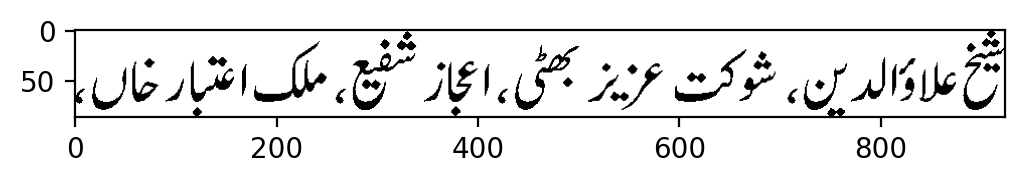

Input tensor: 


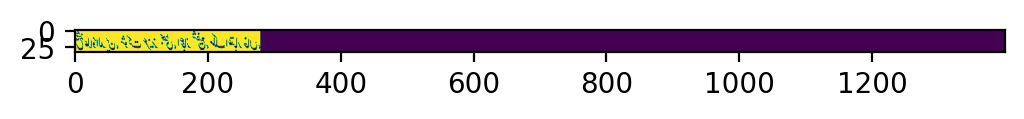

Model prediction: 
شخ عاؤالدین، ٹوکت عزیز بھٹی، عجاز شفی، ملک اتار خاں


In [ ]:
image = test_images[random.randint(0, len(test_images) - 1)]
print("Input image: " + image)
plt.imshow(cv.imread(image))
plt.show()
image = cv.imread(image, 0)
image = resize_and_pad(image)
print("Input tensor: ")
plt.imshow(image)
plt.show()
image = torch.FloatTensor(image).to(device).unsqueeze(0).unsqueeze(0)
indices = model(image).argmax(2).squeeze().cpu()
print("Model prediction: ")
print(indices_to_text(indices))

# Evaluation

In [ ]:
!pip install jellyfish

     |████████████████████████████████| 92kB 5.4MB/s 


In [ ]:
import jellyfish

In [ ]:
def crr(gt, pred):
    return 1 - jellyfish.levenshtein_distance(gt, pred) / len(gt)

In [ ]:
# Computing average Character Recognition Rate
crrs = []
for x, y, _, _ in tqdm.tqdm(test_data):
  x = x.unsqueeze(0).to(device)
  _y = model(x)
  _y = _y.squeeze().argmax(dim=1).cpu()
  y, _y = indices_to_text(y), indices_to_text(_y)
  crrs.append(crr(y, _y))
print()
print("Average CRR = " + str(sum(crrs) / len(crrs)))

100%|██████████| 1007/1007 [00:20<00:00, 49.16it/s]


Average CRR = 0.923723015266236
